In [67]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

In [68]:
def display(images):
    fig = plt.figure(figsize=(25, 25))
    i = 0
    for img in images:
        i += 1
        fig.add_subplot(5,5,i)
        plt.imshow(img)
    plt.show()
    

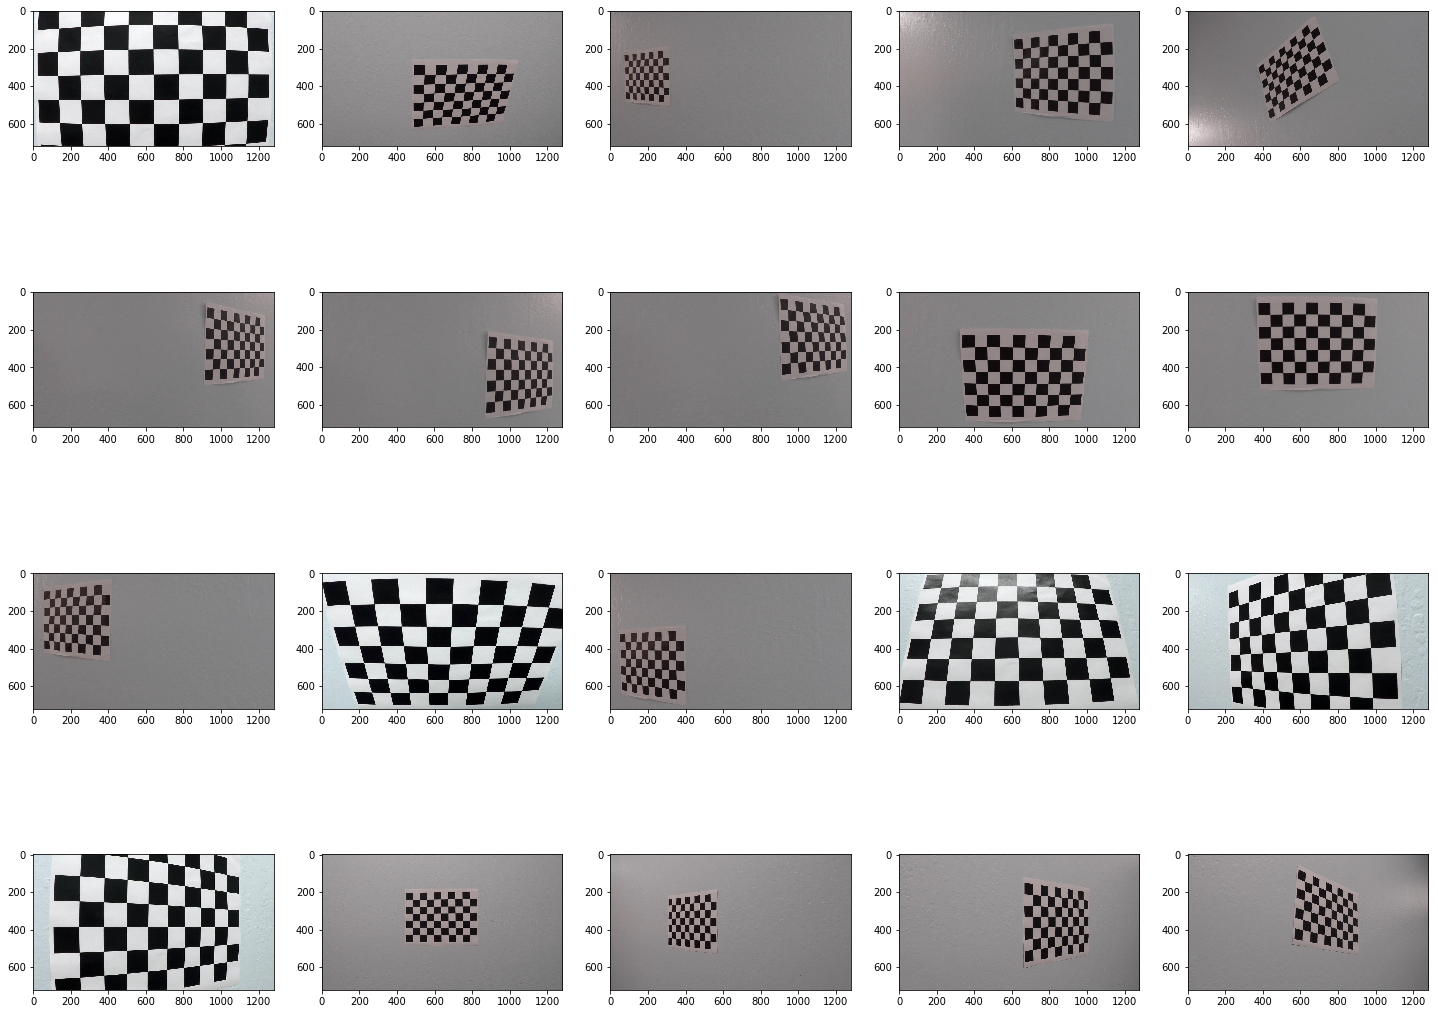

In [69]:
images = [cv2.imread(image) for image in glob.glob("camera_cal/calibration*.jpg")]
display(images)
objp = np.zeros((6*9, 3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1, 2)

objpoints = []
imgpoints = []

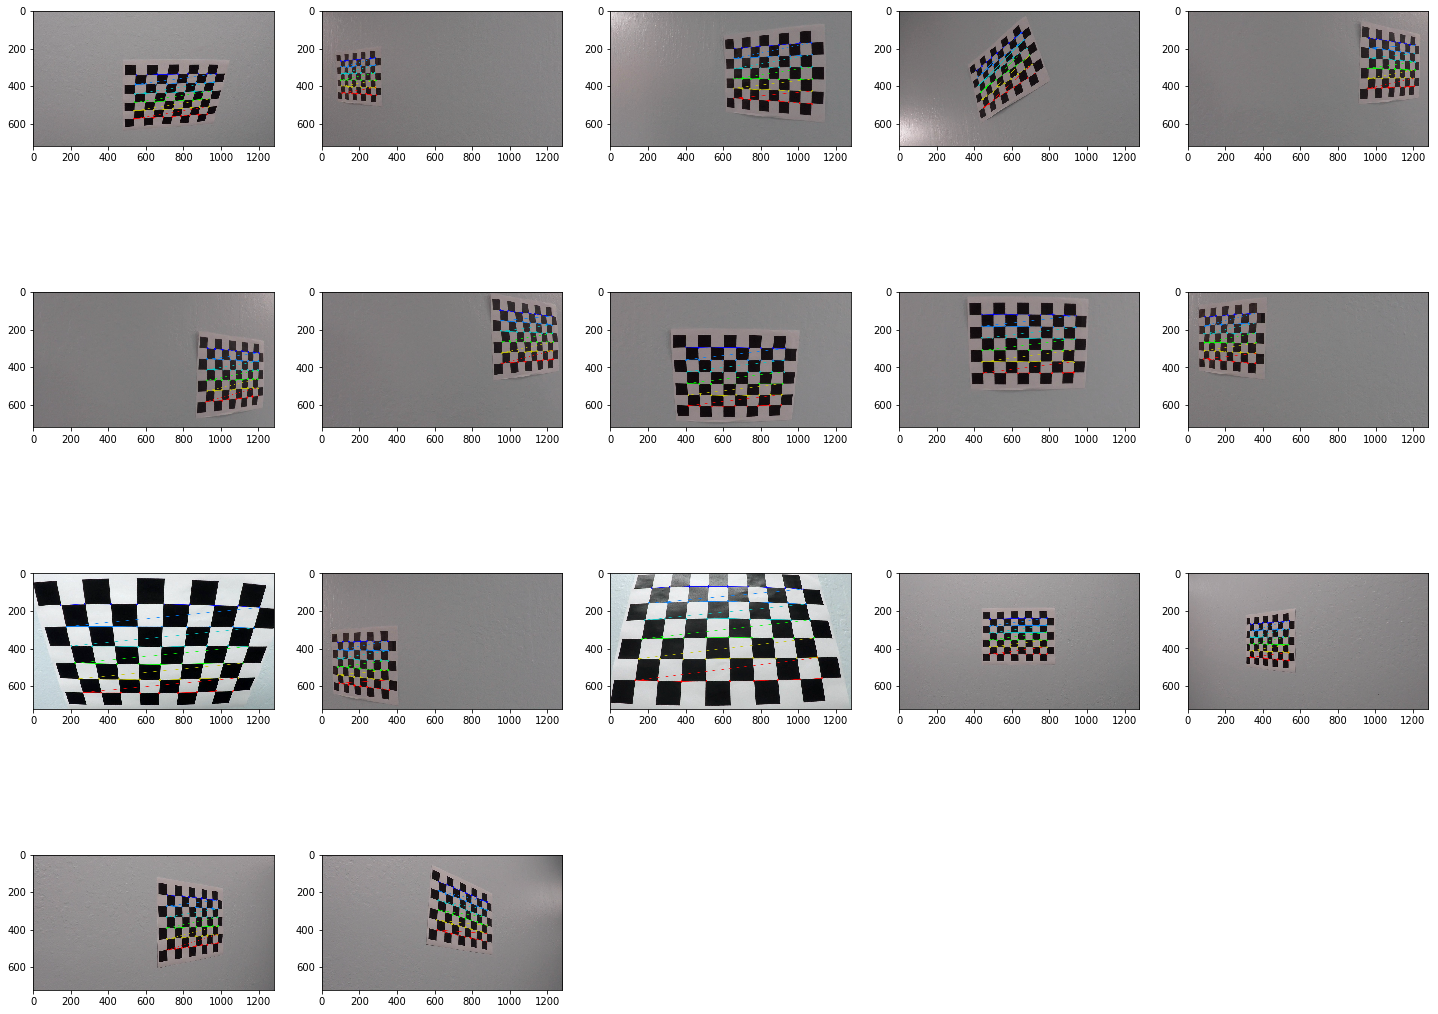

In [70]:

nx = 9
ny = 6
i=0

chessboard=[]

for img in images:
    gray  = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(img, (nx, ny),None)
    if ret ==  True:
        cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
        chessboard.append(img)
        imgpoints.append(corners)
        objpoints.append(objp)

display(chessboard)

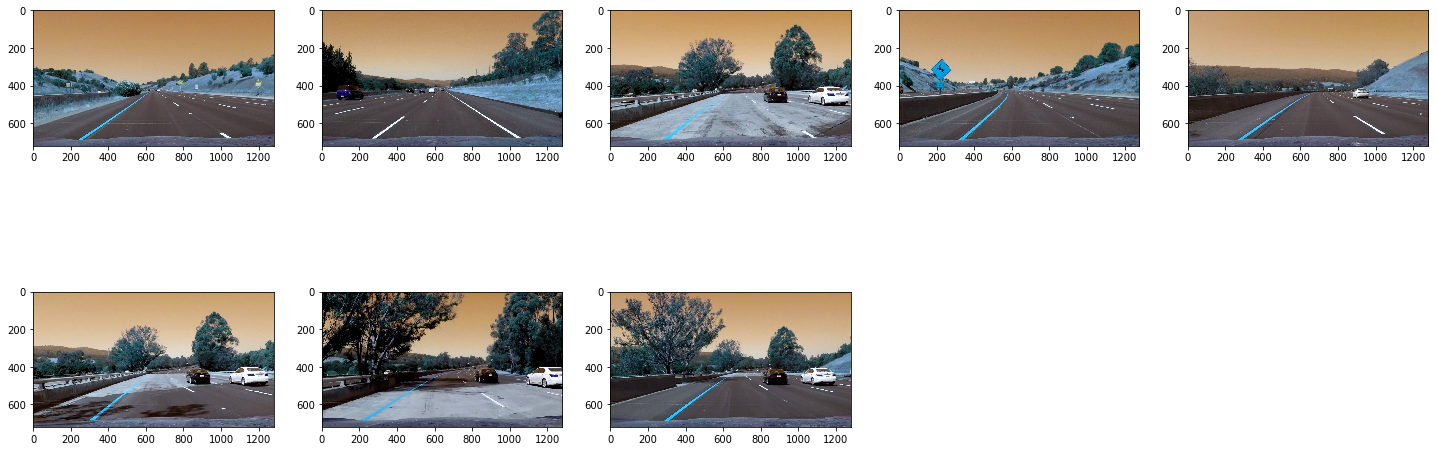

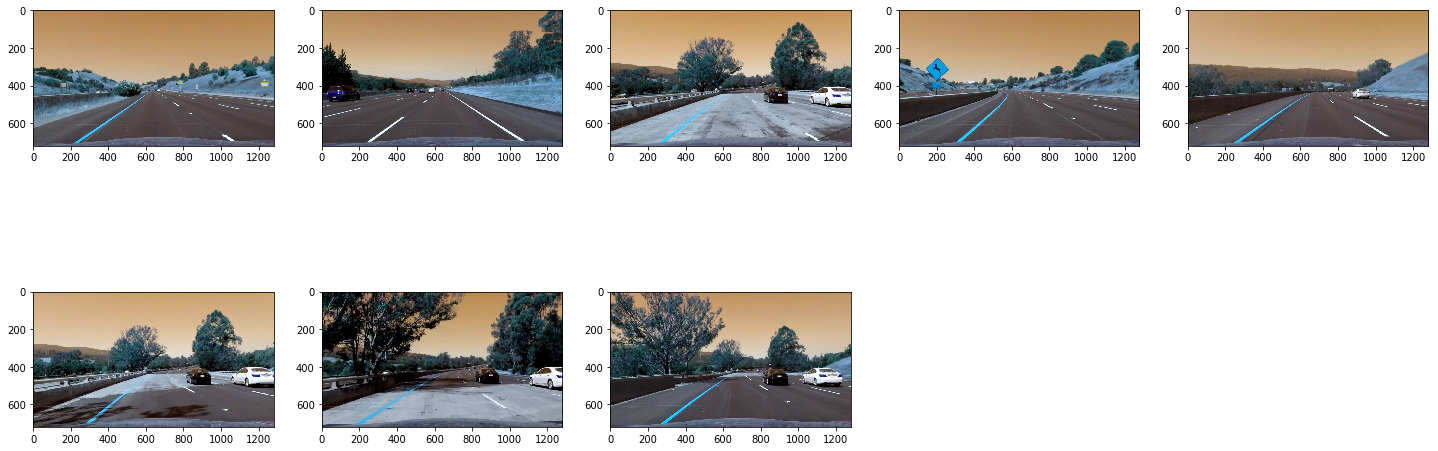

In [73]:
track_images = [cv2.imread(image) for image in glob.glob("test_images/*.jpg")]
# Use cv2.calibrateCamera() and cv2.undistort()
track_images_undist = []
def cal_calibrate(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    return dst
#plt.imshow(dst)

for img in track_images:
    track_images_undist.append(cal_calibrate(img))

display(track_images)
plt.show()
display(track_images_undist)